# <a id='toc1_'></a>[Project: Wrangling and Analyze Data](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Project: Wrangling and Analyze Data](#toc1_)    
  - [Data Gathering](#toc1_1_)    
    - [Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)](#toc1_1_1_)    
    - [Use the Requests library to download the tweet image prediction (image_predictions.tsv)](#toc1_1_2_)    
    - [Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)](#toc1_1_3_)    
  - [Assessing Data](#toc1_2_)    
    - [1. Checking for missing data  ](#toc1_2_1_)    
    - [2. Address tidiness after structural issues and before content issues  ](#toc1_2_2_)    
    - [3. Remaining data quality issues  ](#toc1_2_3_)    
    - [Quality issues](#toc1_2_4_)    
    - [Tidiness issues](#toc1_2_5_)    
  - [Cleaning Data](#toc1_3_)    
    - [Issue #1:](#toc1_3_1_)    
      - [Define:](#toc1_3_1_1_)    
      - [Code](#toc1_3_1_2_)    
      - [Test](#toc1_3_1_3_)    
    - [Issue #2:](#toc1_3_2_)    
      - [Define](#toc1_3_2_1_)    
      - [Code](#toc1_3_2_2_)    
      - [Test](#toc1_3_2_3_)    
    - [Issue #3:](#toc1_3_3_)    
      - [Define](#toc1_3_3_1_)    
      - [Code](#toc1_3_3_2_)    
      - [Test](#toc1_3_3_3_)    
    - [Issue #4:](#toc1_3_4_)    
      - [Define](#toc1_3_4_1_)    
      - [Code](#toc1_3_4_2_)    
      - [Test](#toc1_3_4_3_)    
    - [Issue #5:](#toc1_3_5_)    
      - [Define](#toc1_3_5_1_)    
      - [Code](#toc1_3_5_2_)    
      - [Test](#toc1_3_5_3_)    
    - [Issue #6:](#toc1_3_6_)    
      - [Define](#toc1_3_6_1_)    
      - [Code](#toc1_3_6_2_)    
      - [Test](#toc1_3_6_3_)    
    - [Issue #7:](#toc1_3_7_)    
      - [Define](#toc1_3_7_1_)    
      - [Code](#toc1_3_7_2_)    
      - [Test](#toc1_3_7_3_)    
    - [Issue #8:](#toc1_3_8_)    
      - [Define](#toc1_3_8_1_)    
      - [Code](#toc1_3_8_2_)    
      - [Test](#toc1_3_8_3_)    
  - [Storing Data](#toc1_4_)    
  - [Analyzing and Visualizing Data](#toc1_5_)    
      - [Questions](#toc1_5_1_1_)    
      - [Visuals](#toc1_5_1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Data Gathering](#toc0_)
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.


In [1345]:
#import all the libraries necessary in this workbook
import pandas as pd
import numpy as np
import requests
import os

### <a id='toc1_1_1_'></a>[Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)](#toc0_)

In [1346]:
df1=pd.read_csv("..\\data\\twitter-archive-enhanced.csv", sep= ",",)
df1.head(1);

In [1347]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [1348]:
#Change tweet_id from int to str
df1['tweet_id']=df1['tweet_id'].apply(str)

In [1349]:
#Create a list of member ids contained in this dataset
tweet_id_list= df1.tweet_id.tolist()
print(tweet_id_list);

['892420643555336193', '892177421306343426', '891815181378084864', '891689557279858688', '891327558926688256', '891087950875897856', '890971913173991426', '890729181411237888', '890609185150312448', '890240255349198849', '890006608113172480', '889880896479866881', '889665388333682689', '889638837579907072', '889531135344209921', '889278841981685760', '888917238123831296', '888804989199671297', '888554962724278272', '888202515573088257', '888078434458587136', '887705289381826560', '887517139158093824', '887473957103951883', '887343217045368832', '887101392804085760', '886983233522544640', '886736880519319552', '886680336477933568', '886366144734445568', '886267009285017600', '886258384151887873', '886054160059072513', '885984800019947520', '885528943205470208', '885518971528720385', '885311592912609280', '885167619883638784', '884925521741709313', '884876753390489601', '884562892145688576', '884441805382717440', '884247878851493888', '884162670584377345', '883838122936631299', '88348284

In [1350]:
len(tweet_id_list)

2356

### <a id='toc1_1_2_'></a>[Use the Requests library to download the tweet image prediction (image_predictions.tsv)](#toc0_)

In [1351]:
#Read the file downloaded
df2 = pd.read_csv("..\\data\\image_predictions.tsv", sep='\t')
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1352]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### <a id='toc1_1_3_'></a>[Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)](#toc0_)

In [1353]:
#Getting started on the Twitter API

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

import sys
sys.path.append('../code')

import credentials

auth = OAuthHandler(credentials.consumer_key, credentials.consumer_secret)
auth.set_access_token(credentials.access_token, credentials.access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [1354]:
#Reading json data from the saved txt file
from pprint import pprint
import json

df_list=[]

path = 'C:\\Users\\catar\\data-projects\\Github\\udacity-wrangle-and-analyse-data\\data\\tweet_json.txt'

with open(path, encoding='utf-8') as f:
    for line in f:
        df_list.append(json.loads(line))

#Printing the first line of the text file        
df_list[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [1355]:
#Print the list of the first line keys (which should be the same for all the lines)
sorted(df_list[0].keys())

['contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'retweet_count',
 'retweeted',
 'source',
 'truncated',
 'user']

In [1356]:
#create dataframe from list of dictionaires
df3=pd.DataFrame(df_list)

In [1357]:
#select only the columns we want to extract and store it in a dataframe (dt_3)
df3=df3[['id_str','favorite_count','retweet_count']]
df3

,id_str,favorite_count,retweet_count
0,892420643555336193,33626,6953
1,892177421306343426,29162,5255
2,891815181378084864,21940,3462
3,891689557279858688,36701,7171
4,891327558926688256,35098,7700
...,...,...,...
2023,671485057807351808,673,195
2024,671390180817915904,1274,647
2025,671362598324076544,974,257
2026,671357843010908160,351,133


In [1358]:
#saving the tweet_json in a csv file to visually assess it
df3.to_csv('C:\\Users\\catar\\data-projects\\Github\\udacity-wrangle-and-analyse-data\\data\\tweet_json.csv')

>> [!IMPORTANT] After gathering saving the data in files I've changed some code cells to raw


## <a id='toc1_2_'></a>[Assessing Data](#toc0_)
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [1460]:
#Giving the names of the originalfiles to the datasets
twitter_archive_enhanced=df1
image_predictions=df2
tweet_json=df3

### <a id='toc1_2_1_'></a>[1. Checking for missing data](#toc1_)   [&#8593;](#toc0_)

In [1461]:
print("twitter_archive_enhanced shape's is", twitter_archive_enhanced.shape)
print("image_predictions shape's is", image_predictions.shape)
print("tweet_json shape's is", tweet_json.shape)


twitter_archive_enhanced shape's is (2356, 17)
image_predictions shape's is (2075, 12)
tweet_json shape's is (2028, 3)


In [1462]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [1463]:
twitter_archive_enhanced.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1559,688547210804498433,NaN,NaN,2016-01-17 02:23:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frönq. He got caught stealing a waffle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688547210...,9,10,Frönq,NaN,NaN,NaN,NaN


In [1464]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1465]:
image_predictions.sample(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
765,689143371370250240,https://pbs.twimg.com/media/CZBUO2UWsAAKehS.jpg,1,English_springer,0.303781,True,papillon,0.165132,True,Welsh_springer_spaniel,0.149051,True


In [1466]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2028 non-null   object
 1   favorite_count  2028 non-null   int64 
 2   retweet_count   2028 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 47.7+ KB


In [1467]:
tweet_json.sample(1)

,id_str,favorite_count,retweet_count
1397,697881462549430272,2771,1051


**twitter_archive_enhanced**
17 columns, 

Columns with missing values -irrelevant (should not be included in the analysis)

* in_reply_to_status_id
* in_reply_to_user_id
* retweeted_status_id
* retweeted_status_user_id
* retweeted_status_timestamp

Columns with missing values - relevant (want to include in the analysis)

* expanded_urls
* name (missing values represented as values "None")
* doggo (missing values represented as values "None")
* floofer (missing values represented as values "None")
* pupper (missing values represented as values "None")
* puppo (missing values represented as values "None")

**image_predictions**
12 columns. No missing values

**tweet_json**
3 columns. No missing values

These 3 dataframes are linked through a common variable which is the 'tweet_id' and 'id_str'. 
None of these datasets contain the same number of values/rows (2356, 2075, 2028)


### <a id='toc1_2_2_'></a>[2. Address tidiness after structural issues and before content issues](#toc1_)   [&#8593;](#toc0_)

In [1468]:
# Assess the different values and proportions in all the dog stages
dog_stages= twitter_archive_enhanced.value_counts(subset=['doggo', 'floofer','pupper','puppo'], dropna= False).to_frame('counts')
dog_stages['proportion']=dog_stages['counts']/dog_stages['counts'].sum()
dog_stages

counts  proportion
doggo floofer pupper puppo                    
NaN   NaN     NaN    NaN      1976    0.838710
              pupper NaN       245    0.103990
doggo NaN     NaN    NaN        83    0.035229
NaN   NaN     NaN    puppo      29    0.012309
doggo NaN     pupper NaN        12    0.005093
NaN   floofer NaN    NaN         9    0.003820
doggo floofer NaN    NaN         1    0.000424
      NaN     NaN    puppo       1    0.000424

In [1469]:
#confirming that there are dogs with 2 different dog stages at the same time (doggo & puppo)
twitter_archive_enhanced.loc[(twitter_archive_enhanced['doggo'] == 'doggo') & (twitter_archive_enhanced['puppo'] == 'puppo')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,doggo,NaN,NaN,puppo


In [1470]:
#confirming that there are dogs with 2 different dog stages at the same time (doggo & puppo)
twitter_archive_enhanced.loc[(twitter_archive_enhanced['doggo'] == 'doggo') & (twitter_archive_enhanced['floofer'] == 'floofer')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,NaN,doggo,floofer,NaN,NaN


In [1471]:
#confirming that there are dogs with 2 different dog stages at the same time (doggo & puppo)
twitter_archive_enhanced.loc[(twitter_archive_enhanced['doggo'] == 'doggo') & (twitter_archive_enhanced['pupper'] == 'pupper')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,NaN,pupper,NaN
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,NaN,doggo,NaN,pupper,NaN
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,NaN,doggo,NaN,pupper,NaN
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,NaN,pupper,NaN
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,NaN,pupper,NaN
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,NaN,doggo,NaN,pupper,NaN
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,NaN,doggo,NaN,pupper,NaN
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,NaN,pupper,NaN
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,NaN,pupper,NaN
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,NaN,doggo,NaN,pupper,NaN


In [1472]:
#confirming that there are dogs with 2 different dog stages at the same time (doggo & puppo)
twitter_archive_enhanced.loc[(twitter_archive_enhanced['doggo'] == 'doggo') & (twitter_archive_enhanced['puppo'] == 'puppo')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,doggo,NaN,NaN,puppo


In [1473]:
# Assessing duplicated column names
all_columns = pd.Series(list(twitter_archive_enhanced) + list(image_predictions) + list(tweet_json))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

* there are 1976 out of 2356 tweets without dog stages associated (> 80%)
* 14 out of 2356 tweets have 2 dog stages associated simultaneously (< 0.5%)
* there is only 1 common column name between the datasets 'tweet_id'

### <a id='toc1_2_3_'></a>[3. Remaining data quality issues](#toc1_)   [&#8593;](#toc0_)

**Erroneous datatypes**

In [1474]:
#Looking at the data types
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [1475]:
#Looking at the data types
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2028 non-null   object
 1   favorite_count  2028 non-null   int64 
 2   retweet_count   2028 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 47.7+ KB


In [1476]:
#Looking at the data types
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Duplicated values**

In [1477]:
#duplicated values in twitter_archive_enhanced table

print(sum(twitter_archive_enhanced.duplicated()));

#Explore duplicates in the 'expanded_urls' column
print(twitter_archive_enhanced[twitter_archive_enhanced.expanded_urls.duplicated()].tweet_id.count())

twitter_archive_enhanced[twitter_archive_enhanced.expanded_urls.duplicated()]

0
137


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,NaN,NaN,NaN,NaN,NaN
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,NaN,NaN,NaN,NaN,NaN
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,NaN,NaN,NaN,NaN
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,NaN,NaN,NaN,NaN
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,NaN,NaN,pupper,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,NaN,NaN,NaN,NaN
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,NaN,NaN,NaN,NaN
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,NaN,NaN,NaN,NaN,NaN
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,NaN,NaN,NaN,NaN,NaN


In [1478]:
#Example of a duplicated expanded_url value
twitter_archive_enhanced.iloc[2286,9]

'https://twitter.com/dog_rates/status/667182792070062081/photo/1'

In [1479]:
#Example of a duplicated expanded_url value -this one corresponds to retweets
twitter_archive_enhanced.loc[twitter_archive_enhanced['expanded_urls'] == 'https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,NaN,NaN,NaN,NaN
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,NaN,NaN,NaN,NaN


In [1480]:
#duplicated values in twitter_archive_enhanced table
sum(tweet_json.duplicated())
#tweet_json[tweet_json.id_str.duplicated()]

0

In [1481]:
#duplicated values in image_predictions table
print(sum(image_predictions.duplicated()))
image_predictions[image_predictions.jpg_url.duplicated()]

0


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [1482]:
#Example of a duplicated jpg_url value
image_predictions.loc[image_predictions['jpg_url']=='https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False


**Understand values for each dataset and find wrong data**

In [1483]:
#Understand values for the twitter_archive_enhanced ratings
twitter_archive_enhanced[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [1484]:
#Understand values for image predictions

image_predictions[['p1_conf','p2_conf','p3_conf']].describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,6.032417e-02
std,0.271174,1.006657e-01,5.090593e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.364412,5.388625e-02,1.622240e-02
50%,0.588230,1.181810e-01,4.944380e-02
75%,0.843855,1.955655e-01,9.180755e-02
max,1.000000,4.880140e-01,2.734190e-01


In [1485]:
# Sorting the rating_numerator column

twitter_archive_enhanced.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [1486]:
#Count of each unique value in the rating_denominator column

twitter_archive_enhanced.rating_denominator.value_counts()

rating_denominator
10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: count, dtype: int64

In [1487]:
#Explore why there are values > 11 for the rating_denominator
denominator_above11= twitter_archive_enhanced[['tweet_id','timestamp', 
                         'text','expanded_urls',
                         'rating_numerator',
                         'rating_denominator' ]].loc[twitter_archive_enhanced['rating_denominator']>11]
print(denominator_above11.tweet_id.count())
denominator_above11

17


,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator
342,832088576586297345,2017-02-16 04:45:50 +0000,@docmisterio account started on 11/15/15,NaN,11,15
433,820690176645140481,2017-01-15 17:52:40 +0000,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70
902,758467244762497024,2016-07-28 01:00:57 +0000,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150
1120,731156023742988288,2016-05-13 16:15:54 +0000,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170
1165,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20
1202,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50
1228,713900603437621249,2016-03-27 01:29:02 +0000,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90
1254,710658690886586372,2016-03-18 02:46:49 +0000,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80
1274,709198395643068416,2016-03-14 02:04:08 +0000,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50
1351,704054845121142784,2016-02-28 21:25:30 +0000,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50


In [1488]:
#Explore the name variable in twitter_archive_enhanced

twitter_archive_enhanced.name.value_counts()

name
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
              ..
Aqua           1
Chase          1
Meatball       1
Rorie          1
Christoper     1
Name: count, Length: 956, dtype: int64

### <a id='toc1_2_4_'></a>[Quality issues](#toc0_)

1. There are 181 retweets and 75 in_reply_to_status_id from twitter_archive_enhanced table that we do not want to include in this data analysis

2. Duplicated values in twitter_archive_enhanced table

3. Retweet and replies in the image_predictions table

4. Duplicated values for jpg_url in the image_predictions table

5. There are several entries in ´names´ column that are not dog names such has: "such, not, one, O, very, his, very, getting, this"; they all start with lowercases. "O" stands for "O'Malley"; "his" stands for "Quizno"; the rest of the tweets do not mention a Dogs name comments that the image does not represent a dog

6. Nulls represented as ´"None" in columns nameand `dog_stages´

7. Erroneous datatypes: timestamp should be datetype, dog_stage should be categorical

8. There are several entries in ´names´ column with strange characters like: Ralph├®, Olivi├®r (2 times), Am├®lie, G├▓rd├│n.

**Issues not included**

1. There are incorrect values for the rating_denominator

    * rating_denominator = 11; some are reffering to the tragic date 9/11 surviving dogs ->(tweet_id:775096608509886000, rating 14/10, tweet_id:740373189193256000, rating 14/10; )
    * other is reffering also to a 7/11 expression ( tweet_id:682962037429899000, rating 10/10)
    * tweet_id:722974582966214000, rating 13/10
    * tweet_id:716439118184652000, rating 11/10


### <a id='toc1_2_5_'></a>[Tidiness issues](#toc0_)

1. In the twitter_archive_enhanced table the columns doggo, floofer ,pupper, puppo should represent 1 variable named 'dog_stage'. For some of the rows, there are 2 types of dog stages associated, which should be divided by a comma.
2. The 3 tables should be joined together.

## <a id='toc1_3_'></a>[Cleaning Data](#toc0_)
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [1388]:
# Make copies of original pieces of data
twitter_archive_enhanced_clean=twitter_archive_enhanced.copy()
image_predictions_clean=image_predictions.copy()
tweet_json_clean=tweet_json.copy()

**1. Start with completeness issues** 

* Do we have all of the records that we should?
* Do we have missing records or not?
* Are there specific rows, columns, or cells missing?

We do have missing values in the twitter_archive_enhanced:

Columns with missing values -irrelevant (not included in the analysis)

* in_reply_to_status_id
* in_reply_to_user_id
* retweeted_status_id
* retweeted_status_user_id
* retweeted_status_timestamp

Columns with missing values - relevant

* expanded_urls
* name (missing values represented as values "None")
* doggo (missing values represented as values "None")
* floofer (missing values represented as values "None")
* pupper (missing values represented as values "None")
* puppo (missing values represented as values "None")

BUT some are for irrelevant columns and other we cannot do anything (because these values are taken from text column. If this column does not contain the information we do not have anything else to have that info)



**2. Address Tidiness After Structural Issues and Before Content Issues**

Messy data= structural issues; untidy data

* Each variable forms a column
* Each observation forms a row
* Each observational unit forms a table

### <a id='toc1_3_1_'></a>[Issue #1:](#toc0_)

1. In the twitter_archive_enhanced table the columns doggo, floofer ,pupper, puppo should represent 1 variable named 'dog_stage'. For some of the rows, there are 2 types of dog stages associated, which should be divided by a comma.

#### <a id='toc1_3_1_1_'></a>[Define:](#toc0_)

* Create a ghost column to detect rows with no dog_stage information (doggo, floofer ,pupper, puppo= "None".
* Separate the rows with 2 dog stages at the same time in a different dataframe; join them in 1 'dogstage' column create a multiple stages dataframe and clean it (columns).
* For the single dog stages + the rows with no dog stage: Melt the doggo, floofer, pupper and puppo columns to a 'dogstage' column.
* Eliminate the rows that are multiplied in the melting process using the ghost column
* Clean this dataframe (columns) and merge it with the multiple stages dataframe.




#### <a id='toc1_3_1_2_'></a>[Code](#toc0_)

In [1389]:
twitter_archive_enhanced_clean.value_counts(subset=['doggo', 'floofer','pupper','puppo'], dropna= False)

doggo  floofer  pupper  puppo
NaN    NaN      NaN     NaN      1976
                pupper  NaN       245
doggo  NaN      NaN     NaN        83
NaN    NaN      NaN     puppo      29
doggo  NaN      pupper  NaN        12
NaN    floofer  NaN     NaN         9
doggo  floofer  NaN     NaN         1
       NaN      NaN     puppo       1
Name: count, dtype: int64

In [1390]:
#create new column to save all the values that correspond to no dog stage rows (it should be 1976 rows)
twitter_archive_enhanced_clean['none_values']=np.where((twitter_archive_enhanced_clean['doggo'].isnull())
                                                     & (twitter_archive_enhanced_clean['floofer'].isnull())
                                                     & (twitter_archive_enhanced_clean['pupper'].isnull())
                                                     & (twitter_archive_enhanced_clean['puppo'].isnull()), 'None', 'other')
twitter_archive_enhanced_clean.none_values.value_counts()

none_values
None     1976
other     380
Name: count, dtype: int64

In [1391]:
# Create a dataframe that only includes the multiple dog stages rows
df_multiple=twitter_archive_enhanced_clean
df_multiple=df_multiple.loc[(((df_multiple['doggo']=='doggo') & (df_multiple['pupper']=='pupper'))
                                | ((df_multiple['doggo']=='doggo') & (df_multiple['floofer']=='floofer'))
                                | ((df_multiple['doggo']=='doggo') & (df_multiple['puppo']=='puppo')))]
df_multiple.shape

(14, 18)

In [1392]:
# Join the 4 columns of each dogstage in 1 list
combined_text = df_multiple['doggo'].fillna('') + '+' + df_multiple['pupper'].fillna('') + '+' + df_multiple['floofer'].fillna('') + '+' + df_multiple['puppo'].fillna('')

#Remove all the unnecessary '+'
combined_text = combined_text.str.replace('+++', '+').str.strip('+')
combined_text= combined_text.str.replace('++', '+').str.strip('+')

# Create new dogstage column in the multiple dog stages dataframe
df_multiple_clean=df_multiple.copy()
df_multiple_clean.loc[:,'dogstage']=combined_text

# Drop columns not used
df_multiple_clean = df_multiple_clean.drop(columns=['none_values', 'doggo','floofer','pupper','puppo'])



In [1393]:
# Create dataframe without multiple dog stages rows
df=twitter_archive_enhanced_clean
df=df.loc[~((df['doggo']=='doggo') & (df['pupper']=='pupper'))]
df=df.loc[~((df['doggo']=='doggo') & (df['floofer']=='floofer'))]
df=df.loc[~((df['doggo']=='doggo') & (df['puppo']=='puppo'))]
df.shape

(2342, 18)

In [1394]:
# Use the melt function in the df
df_melted = pd.melt(df, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source','text',
                                'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator',
                                'rating_denominator','name','none_values'], value_vars=['doggo', 'floofer' ,'pupper','puppo'],var_name='dogstage')

#Make the 'dogstage' variable 'none' when the none_values and 'dogstage' are simultaneously 'none'/null
df_melted.loc[((df_melted['none_values'] == 'None') & (df_melted.value.isnull())) , 'dogstage'] = "None"

#Drop the values that are different than 'None' in the 'dogstage' column but null in the value.
df_melted=df_melted.loc[~((df_melted['dogstage'] != 'None') & (df_melted.value.isnull()))]

#Drop the rows that are duplicated because of the ghost column 'none_values'
df_melted_clean=df_melted.loc[~(df_melted.duplicated())]

# drop columns not used
df_melted_clean = df_melted_clean.drop(columns=['none_values', 'value'])

df_melted_clean.columns


Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dogstage'],
      dtype='object')

In [1395]:
# Merge the 2 dataframes to include all the different single and multiple stages of the dogs
df_final=pd.merge(df_melted_clean, df_melted_clean, how = 'outer')

twitter_archive_enhanced_clean = df_final

#### <a id='toc1_3_1_3_'></a>[Test](#toc0_)

In [1396]:
#Before
twitter_archive_enhanced[['doggo', 'floofer','pupper','puppo']].value_counts(dropna= False)

doggo  floofer  pupper  puppo
NaN    NaN      NaN     NaN      1976
                pupper  NaN       245
doggo  NaN      NaN     NaN        83
NaN    NaN      NaN     puppo      29
doggo  NaN      pupper  NaN        12
NaN    floofer  NaN     NaN         9
doggo  floofer  NaN     NaN         1
       NaN      NaN     puppo       1
Name: count, dtype: int64

In [1397]:
#After
twitter_archive_enhanced_clean.dogstage.value_counts()

dogstage
None       1976
pupper      245
doggo        83
puppo        29
floofer       9
Name: count, dtype: int64

In [1398]:
twitter_archive_enhanced_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dogstage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


### <a id='toc1_3_2_'></a>[Issue #2:](#toc0_)

1. The 3 tables should be joined together.

#### <a id='toc1_3_2_1_'></a>[Define](#toc0_)

* Change 'id_str' column name in table `tweet_json` to 'tweet_id' in orther to join the data.
* Change the data type of `image_predictions` ´tweet_id´to string
* Join together the 3 tables `twitter_archive_enhanced`, `tweet_json` and `image_predictions` using pandas.merge().

#### <a id='toc1_3_2_2_'></a>[Code](#toc0_)

In [1399]:
#First we need to change ´id_str´ column name to ´tweet_id´
tweet_json_clean=tweet_json_clean.rename(columns = {'id_str' :'tweet_id' })

#Change datatype of 'tweet_id' column of `image_predictions_clean` table from int to str
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)


In [1400]:
#First merge twitter_archive_enhanced_clean and tweet_json_clean tables
twitter_archive_enhanced_clean = pd.merge(twitter_archive_enhanced_clean, tweet_json_clean, on=['tweet_id'], how='left')

#The merge the result with the c
twitter_archive_enhanced_clean=pd.merge(twitter_archive_enhanced_clean, image_predictions_clean, on=['tweet_id'], how='left')

#### <a id='toc1_3_2_3_'></a>[Test](#toc0_)

In [1401]:
list(tweet_json_clean)

['tweet_id', 'favorite_count', 'retweet_count']

In [1402]:
list(twitter_archive_enhanced_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dogstage',
 'favorite_count',
 'retweet_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [1403]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2342 non-null   object 
 1   in_reply_to_status_id       77 non-null     float64
 2   in_reply_to_user_id         77 non-null     float64
 3   timestamp                   2342 non-null   object 
 4   source                      2342 non-null   object 
 5   text                        2342 non-null   object 
 6   retweeted_status_id         179 non-null    float64
 7   retweeted_status_user_id    179 non-null    float64
 8   retweeted_status_timestamp  179 non-null    object 
 9   expanded_urls               2283 non-null   object 
 10  rating_numerator            2342 non-null   int64  
 11  rating_denominator          2342 non-null   int64  
 12  name                        1605 non-null   object 
 13  dogstage                    2342 

### <a id='toc1_3_3_'></a>[Issue #3:](#toc0_)

1. There are 181 retweets and 75 in_reply_to_status_id from twitter_archive_enhanced table that we do not want to include in this data analysis

#### <a id='toc1_3_3_1_'></a>[Define](#toc0_)

* Store the retweet and reply tweet_id's.
* Remove the 181 retweets (in_reply_to_status_id) and 75 in_reply_to_status_id that we do not want to include in this data analysis
* Drop the empty columns

#### <a id='toc1_3_3_2_'></a>[Code](#toc0_)

In [1404]:
#Store the retweet and replies to status tweet_id values
retweet=twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean['retweeted_status_id'].notnull())]
retweet_list= retweet.tweet_id.tolist()

reply=twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean['in_reply_to_status_id'].notnull())]
reply_list= reply.tweet_id.tolist()
[retweet_list,reply_list]

[['888202515573088257',
  '886054160059072513',
  '885311592912609280',
  '879130579576475649',
  '878404777348136964',
  '878316110768087041',
  '874434818259525634',
  '873697596434513921',
  '872668790621863937',
  '871166179821445120',
  '869988702071779329',
  '868639477480148993',
  '867072653475098625',
  '863471782782697472',
  '861769973181624320',
  '860981674716409858',
  '860924035999428608',
  '860177593139703809',
  '858860390427611136',
  '857062103051644929',
  '856602993587888130',
  '856330835276025856',
  '855245323840757760',
  '855138241867124737',
  '852936405516943360',
  '851953902622658560',
  '851861385021730816',
  '847978865427394560',
  '847971574464610304',
  '845459076796616705',
  '845098359547420673',
  '842892208864923648',
  '841833993020538882',
  '840761248237133825',
  '840728873075638272',
  '838916489579200512',
  '838831947270979586',
  '838201503651401729',
  '837012587749474308',
  '836648853927522308',
  '836397794269200385',
  '8356852854469

In [1405]:
len(retweet_list), len(reply_list)

(179, 77)

In [1406]:
#remove retweets
twitter_archive_enhanced_clean=twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean['retweeted_status_id'].isnull())]

In [1407]:
#remove replies to status
twitter_archive_enhanced_clean=twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean['in_reply_to_status_id'].isnull())]

In [1408]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2086 entries, 0 to 2341
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2086 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2086 non-null   object 
 4   source                      2086 non-null   object 
 5   text                        2086 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2083 non-null   object 
 10  rating_numerator            2086 non-null   int64  
 11  rating_denominator          2086 non-null   int64  
 12  name                        1489 non-null   object 
 13  dogstage                    2086 non-n

In [1409]:
#Drop columns
twitter_archive_enhanced_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
                                    , axis=1, inplace=True)

#### <a id='toc1_3_3_3_'></a>[Test](#toc0_)

In [1410]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2086 entries, 0 to 2341
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2086 non-null   object 
 1   timestamp           2086 non-null   object 
 2   source              2086 non-null   object 
 3   text                2086 non-null   object 
 4   expanded_urls       2083 non-null   object 
 5   rating_numerator    2086 non-null   int64  
 6   rating_denominator  2086 non-null   int64  
 7   name                1489 non-null   object 
 8   dogstage            2086 non-null   object 
 9   favorite_count      1786 non-null   float64
 10  retweet_count       1786 non-null   float64
 11  jpg_url             1961 non-null   object 
 12  img_num             1961 non-null   float64
 13  p1                  1961 non-null   object 
 14  p1_conf             1961 non-null   float64
 15  p1_dog              1961 non-null   object 
 16  p2         

### <a id='toc1_3_4_'></a>[Issue #4:](#toc0_)

1. Duplicated values in twitter_archive_enhanced table

#### <a id='toc1_3_4_1_'></a>[Define](#toc0_)

* Remove duplicates that are not NaN

#### <a id='toc1_3_4_2_'></a>[Code](#toc0_)

In [1411]:
# Remove duplicates that are not NaN
twitter_archive_enhanced_clean=twitter_archive_enhanced_clean.loc[~((twitter_archive_enhanced_clean
                                                                     .expanded_urls.duplicated()) 
                                                                        & (twitter_archive_enhanced_clean['expanded_urls']
                                                                            .notnull()))]

#### <a id='toc1_3_4_3_'></a>[Test](#toc0_)

In [1412]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.expanded_urls.duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogstage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
632,785515384317313025,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,10,10,NaN,None,5762.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2197,696518437233913856,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,10,10,NaN,pupper,3619.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1413]:
twitter_archive_enhanced_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dogstage',
       'favorite_count', 'retweet_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

### <a id='toc1_3_5_'></a>[Issue #5:](#toc0_)

* Duplicated values for jpg_url in the image_predictions table


#### <a id='toc1_3_5_1_'></a>[Define](#toc0_)

#### <a id='toc1_3_5_2_'></a>[Code](#toc0_)

In [1414]:
twitter_archive_enhanced_clean=twitter_archive_enhanced_clean.loc[~(twitter_archive_enhanced_clean.jpg_url.duplicated())]

#### <a id='toc1_3_5_3_'></a>[Test](#toc0_)

In [1415]:
sum(twitter_archive_enhanced_clean.jpg_url.duplicated())

0

In [1416]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1962 entries, 0 to 2341
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1962 non-null   object 
 1   timestamp           1962 non-null   object 
 2   source              1962 non-null   object 
 3   text                1962 non-null   object 
 4   expanded_urls       1962 non-null   object 
 5   rating_numerator    1962 non-null   int64  
 6   rating_denominator  1962 non-null   int64  
 7   name                1442 non-null   object 
 8   dogstage            1962 non-null   object 
 9   favorite_count      1663 non-null   float64
 10  retweet_count       1663 non-null   float64
 11  jpg_url             1961 non-null   object 
 12  img_num             1961 non-null   float64
 13  p1                  1961 non-null   object 
 14  p1_conf             1961 non-null   float64
 15  p1_dog              1961 non-null   object 
 16  p2         

### <a id='toc1_3_6_'></a>[Issue #6:](#toc0_)

* There are several entries in ´names´ column that are not dog names such has: "such, not, one, O, very, his, very, getting, this"; they all start with lowercases. "O" stands for "O'Malley"; "his" stands for "Quizno"; the rest of the tweets do not mention a Dogs name comments that the image does not represent a dog

#### <a id='toc1_3_6_1_'></a>[Define](#toc0_)

* Change the 'name' value to "O'Malley" for the currrent value "O"
* Change the 'name' value to "Quizno" for the currrent value "his"
* Change the 'name' values to "None" for the all the values starting with lowercase letters(101):
    
    Examples: "such, not, one, very, very, getting, this"

In [1417]:
twitter_archive_enhanced_clean.name.value_counts()

name
a          55
Charlie    11
Oliver     10
Cooper     10
Lucy       10
           ..
Meyer       1
Arnie       1
Stewie      1
Lilah       1
Bayley      1
Name: count, Length: 931, dtype: int64

#### <a id='toc1_3_6_2_'></a>[Code](#toc0_)

In [1418]:
#Change the 'name' value to "O'Malley" for the currrent value "O"
twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean['name'] == 'O'), 'name'] = "O'Malley"

In [1419]:
#Change the 'name' value to "Quizno" for the currrent value "his"
twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean['name'] == 'his'), 'name'] = 'Quizno'

In [1420]:
#Change the 'name' values to "None" for the all the values starting with lowercase letters(101)
twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean['name'].str.islower()) | (twitter_archive_enhanced_clean['name'].isnull()) , 'name'] = 'None'

#### <a id='toc1_3_6_3_'></a>[Test](#toc0_)

In [1421]:
twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean['name'] == 'O')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogstage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [1422]:
twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean['name'] == 'his')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogstage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [1423]:
twitter_archive_enhanced_clean.name.value_counts()

name
None        96
Charlie     11
Oliver      10
Cooper      10
Lucy        10
            ..
Storkson     1
Remy         1
Chadrick     1
Kellogg      1
Bayley       1
Name: count, Length: 911, dtype: int64

In [1424]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1962 entries, 0 to 2341
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1962 non-null   object 
 1   timestamp           1962 non-null   object 
 2   source              1962 non-null   object 
 3   text                1962 non-null   object 
 4   expanded_urls       1962 non-null   object 
 5   rating_numerator    1962 non-null   int64  
 6   rating_denominator  1962 non-null   int64  
 7   name                1442 non-null   object 
 8   dogstage            1962 non-null   object 
 9   favorite_count      1663 non-null   float64
 10  retweet_count       1663 non-null   float64
 11  jpg_url             1961 non-null   object 
 12  img_num             1961 non-null   float64
 13  p1                  1961 non-null   object 
 14  p1_conf             1961 non-null   float64
 15  p1_dog              1961 non-null   object 
 16  p2         

### <a id='toc1_3_7_'></a>[Issue #7:](#toc0_)

* Nulls represented as ´"None" in columns nameand `dog_stages´

#### <a id='toc1_3_7_1_'></a>[Define](#toc0_)

#### <a id='toc1_3_7_2_'></a>[Code](#toc0_)

In [1425]:
twitter_archive_enhanced_clean.name=twitter_archive_enhanced_clean.name.replace('None', np.nan)

In [1426]:
twitter_archive_enhanced_clean.dogstage=twitter_archive_enhanced_clean.dogstage.replace('None', np.nan)

#### <a id='toc1_3_7_3_'></a>[Test](#toc0_)

In [1427]:
twitter_archive_enhanced_clean.dogstage.value_counts()

dogstage
pupper     201
doggo       63
puppo       22
floofer      7
Name: count, dtype: int64

In [1428]:
twitter_archive_enhanced_clean.name.value_counts()

name
Charlie    11
Cooper     10
Oliver     10
Lucy       10
Penny       9
           ..
Tayzie      1
Grizzie     1
Gilbert     1
Meyer       1
Bayley      1
Name: count, Length: 910, dtype: int64

In [1429]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1962 entries, 0 to 2341
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1962 non-null   object 
 1   timestamp           1962 non-null   object 
 2   source              1962 non-null   object 
 3   text                1962 non-null   object 
 4   expanded_urls       1962 non-null   object 
 5   rating_numerator    1962 non-null   int64  
 6   rating_denominator  1962 non-null   int64  
 7   name                1346 non-null   object 
 8   dogstage            293 non-null    object 
 9   favorite_count      1663 non-null   float64
 10  retweet_count       1663 non-null   float64
 11  jpg_url             1961 non-null   object 
 12  img_num             1961 non-null   float64
 13  p1                  1961 non-null   object 
 14  p1_conf             1961 non-null   float64
 15  p1_dog              1961 non-null   object 
 16  p2         

### <a id='toc1_3_8_'></a>[Issue #8:](#toc0_)

* Erroneous datatypes: timestamp should be datetype, dog_stage should be categorical

#### <a id='toc1_3_8_1_'></a>[Define](#toc0_)

* Change timestamp to datetype,
* Change dog_stage to categorical

#### <a id='toc1_3_8_2_'></a>[Code](#toc0_)

In [1430]:
twitter_archive_enhanced_clean.timestamp= pd.to_datetime(twitter_archive_enhanced_clean.timestamp)

In [1431]:
twitter_archive_enhanced_clean.dogstage = twitter_archive_enhanced_clean.dogstage.astype('category')

#### <a id='toc1_3_8_3_'></a>[Test](#toc0_)

In [1432]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1962 entries, 0 to 2341
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1962 non-null   object             
 1   timestamp           1962 non-null   datetime64[ns, UTC]
 2   source              1962 non-null   object             
 3   text                1962 non-null   object             
 4   expanded_urls       1962 non-null   object             
 5   rating_numerator    1962 non-null   int64              
 6   rating_denominator  1962 non-null   int64              
 7   name                1346 non-null   object             
 8   dogstage            293 non-null    category           
 9   favorite_count      1663 non-null   float64            
 10  retweet_count       1663 non-null   float64            
 11  jpg_url             1961 non-null   object             
 12  img_num             1961 non-null   flo

## <a id='toc1_4_'></a>[Storing Data](#toc0_)
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [1433]:
twitter_archive_enhanced_clean.to_csv('..\\data\\twitter_archive_master.csv', index=False)

## <a id='toc1_5_'></a>[Analyzing and Visualizing Data](#toc0_)
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### <a id='toc1_5_1_1_'></a>[Questions](#toc0_)

1. What is the dog breed which appears the most?
2. And the one that receives the best highest scores?
3. The best ponctuated dog image

#### <a id='toc1_5_1_2_'></a>[Visuals](#toc0_)

In [1434]:
#Import libraries necessary to do visualizations

import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [1435]:
we_rate_dogs = twitter_archive_enhanced_clean
we_rate_dogs.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1962.000000,1962.000000,1663.000000,1663.000000,1961.000000,1961.000000,1.961000e+03,1.961000e+03
mean,12.229358,10.479613,8826.921828,2541.260974,1.202448,0.593877,1.347503e-01,6.023435e-02
std,41.729116,6.868907,11824.770619,4225.637922,0.559987,0.272077,1.011080e-01,5.094378e-02
min,0.000000,2.000000,351.000000,80.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,2302.000000,690.000000,1.000000,0.362925,5.353130e-02,1.619070e-02
50%,11.000000,10.000000,4440.000000,1344.000000,1.000000,0.587372,1.175080e-01,4.948690e-02
75%,12.000000,10.000000,11076.500000,2879.500000,1.000000,0.846986,1.955730e-01,9.150480e-02
max,1776.000000,170.000000,143846.000000,70107.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [1436]:
#Define the directory where I want my visuals to be saved
save_directory = "..\\visuals\\"

if not os.path.exists(save_directory):
    os.makedirs(save_directory)

In [1437]:
def save_image(image_url, save_directory, filename=None):
    """
    Download an image from a URL and save it to the specified directory.

    Parameters:
        image_url (str): The URL of the image to download.
        save_directory (str): The directory where the image will be saved.
        filename (str, optional): The filename to use for the saved image. 
            If not provided, the filename will be derived from the URL.

    Returns:
        str: The path to the saved image.

    """
    import os
    import requests
    # Send a GET request to the URL
    response = requests.get(image_url)
    
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Get the content of the response (the image data)
        image_data = response.content
        
        # If filename is not provided, derive it from the URL
        if not filename:
            filename = os.path.basename(image_url)
        
        
        # Write the image data to a file in the specified directory
        image_path = os.path.join(save_directory, filename)
        with open(image_path, 'wb') as f:
            f.write(image_data)
        
        return image_path
    else:
        print('Failed to download image from', image_url)
        return None

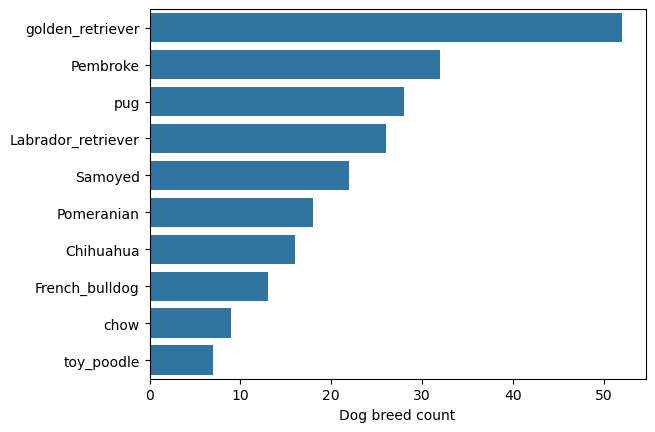

In [1438]:
#Select the dog breeds for which the image predictions algorithm has >84,84% of confidence in the prediction.
dog_breed=we_rate_dogs.loc[we_rate_dogs['p1_conf']>0.848400]
#Also, select only what the algorithm selects as being dog breeds
dog_breed=dog_breed.loc[dog_breed['p1_dog']==True]

#Plot the top 10 most reviewed races in WeRateDogs
dog_breed_counts=dog_breed.p1.value_counts()[:10]
dog_breed_order=dog_breed_counts.index

base_color = sb.color_palette()[0]
sb.countplot(data = dog_breed, y = 'p1', color = base_color, order = dog_breed_order)
plt.xlabel('Dog breed count')
plt.ylabel('')

plt.savefig(save_directory + 'dog_breed_count.png', dpi=300, bbox_inches='tight')

<Axes: >

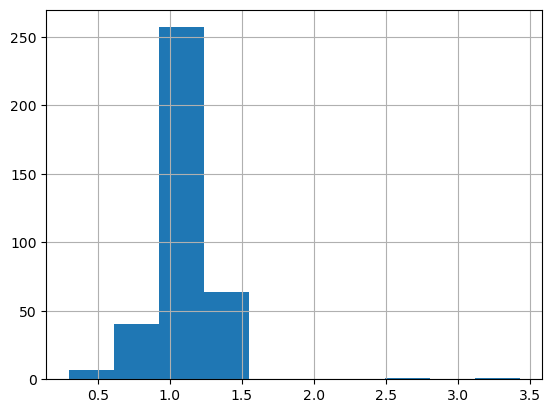

In [1439]:
#Setting the rating as the proportion between the rating_numerator and rating_denominator
dog_breed['rating']=dog_breed['rating_numerator']/dog_breed['rating_denominator']

dog_breed.rating.hist() #to understand outliers 

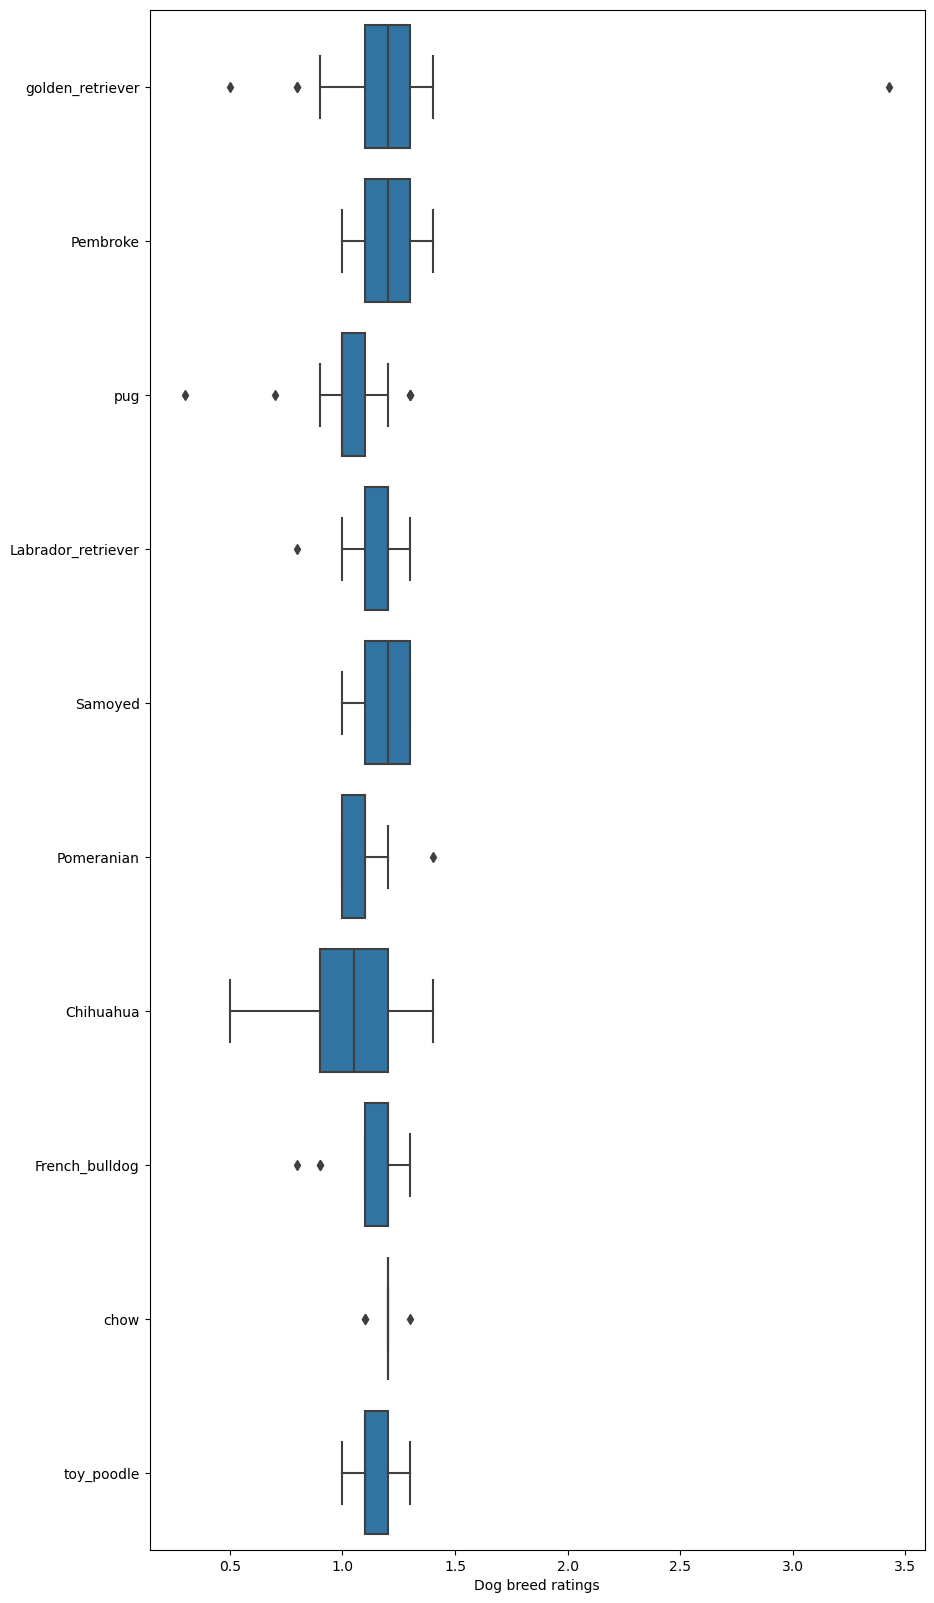

In [1440]:
plt.figure(figsize=[10,20])

sb.boxplot(data = dog_breed, y = 'p1', x='rating', color = base_color, order = dog_breed_order);
plt.xlabel('Dog breed ratings')
plt.ylabel('')
plt.savefig(save_directory + 'dog_breed_ratings.png', dpi=300, bbox_inches='tight')

In [1441]:
#Finding the dog that stands out from the crowd
#Find the maximum value for the 'rating' variable
super_rating=dog_breed['rating'].max()
super_rating

3.4285714285714284

In [1442]:
#Select the row for the maximum value of the rating variable and call it the super dog
super_dog=dog_breed.loc[dog_breed['rating']>=super_rating]
super_dog

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogstage,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
467,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN,5027.0,...,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,3.428571


In [1443]:
#Find the image url for the super dog
super_dog.jpg_url.astype(str)

super_dog.jpg_url

467    https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg
Name: jpg_url, dtype: object

In [1444]:
#Display the super dog image
from IPython.display import Image
from IPython.core.display import HTML 

Image(url= "https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg")


In [1445]:
#save the image of the super_dog
save_image('https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg', save_directory,'super_dog')

'..\\visuals\\super_dog'

In [1446]:
#Explore the variable favorite_count for the 10 most voted dog breeds

#Max value for favorite_count
print(dog_breed['favorite_count'].max())

#Min value for favorite_count
print(dog_breed['favorite_count'].min())

#Sorted values for favorite_count 
dog_breed['favorite_count'].sort_values(ascending=False)

108298.0
577.0


2078    108298.0
325      62087.0
119      46339.0
2313     41783.0
42       39959.0
          ...   
2018         NaN
2027         NaN
2031         NaN
2035         NaN
2038         NaN
Name: favorite_count, Length: 370, dtype: float64

In [1447]:
#First 5 dogs with highest values for favorite_counts
favorite_dogs=dog_breed.loc[(dog_breed['favorite_count']>=39958) & (dog_breed['favorite_count']<108300)]
favorite_dogs.jpg_url

42      https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg
119     https://pbs.twimg.com/media/DAXXDQNXgAAoYQH.jpg
325     https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg
2078    https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg
2313    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg
Name: jpg_url, dtype: object

In [1448]:
#Save the favorite dogs (in terms of favorite_counts) images in the visuals directory

# Save the favorite dogs (in terms of favorite_counts) urls in a list
favorite_dogs_urls=favorite_dogs.sort_values('favorite_count', ascending=True).jpg_url.to_list()
favorite_dogs_urls

# Iterate over the URLs and download/save images
for i, url in enumerate(favorite_dogs_urls, start=1):
    # Generate a filename with the sequence number
    filename = f"top_breeds_{i}.jpg"
    
    # Call the save_image_from_url function with the URL, save directory, and filename
    saved_image_path = save_image(url, save_directory, filename)
    
    if saved_image_path:
        print(f"Image saved from {url} to: {saved_image_path}")
    else:
        print(f"Failed to save image from {url}")

Image saved from https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg to: ..\visuals\top_breeds_1.jpg
Image saved from https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg to: ..\visuals\top_breeds_2.jpg
Image saved from https://pbs.twimg.com/media/DAXXDQNXgAAoYQH.jpg to: ..\visuals\top_breeds_3.jpg
Image saved from https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg to: ..\visuals\top_breeds_4.jpg
Image saved from https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg to: ..\visuals\top_breeds_5.jpg


In [1449]:
#Display the favorite dogs (in terms of favorite_counts) breed and images sorted by favorite_counts

favorite_dogs_1=favorite_dogs.sort_values('favorite_count', ascending=True)

#Create Dataframe including the columns `p1` and 'jpg_url'
favorite_dogs_images=favorite_dogs_1[['p1','jpg_url']]

def path_to_image_html(path):
    """
    Generate HTML code for embedding an image in a webpage.

    Parameters:
        path (str): The path to the image file.

    Returns:
        str: HTML code for embedding the image.
    """
    return '<img src="'+ path + '" width="500" >'


# Convert DataFrame to HTML table with images embedded
html_table= favorite_dogs_images.to_html(escape=False, formatters=dict(jpg_url=path_to_image_html))

# Display the HTML table in Jupyter Notebook
HTML(html_table)

,p1,jpg_url
42,golden_retriever,
2313,Pembroke,
119,Samoyed,
325,Labrador_retriever,
2078,French_bulldog,


In [1450]:
#Explore the variable 'rating'
dog_breed['rating'].value_counts().sort_index(ascending=False)

rating
3.428571      1
2.700000      1
1.400000      6
1.300000     58
1.200000    103
1.100000     85
1.000000     69
0.900000     25
0.800000     11
0.700000      4
0.500000      6
0.300000      1
Name: count, dtype: int64

In [1451]:
#Define super_dogs as the 
super_dogs=dog_breed.loc[dog_breed['rating']==1.4]
super_dogs_images=super_dogs[['p1','jpg_url']]

In [1452]:
# Converting links to html tags
def path_to_image_html(path):
    return '<img src="'+ path + '" width="500" >'

# Rendering the dataframe as HTML table
HTML(super_dogs_images.to_html(escape=False, formatters=dict(jpg_url=path_to_image_html)))

,p1,jpg_url
38,Pembroke,
168,Chihuahua,
398,Gordon_setter,
2080,black-and-tan_coonhound,
2092,Pomeranian,
2101,golden_retriever,


In [1453]:
favorite_breeds=we_rate_dogs.groupby('p1')['favorite_count'].sum()
retweeted_breeds=we_rate_dogs.groupby('p1')['retweet_count'].sum()

In [1454]:
#Explore the popularity of breeds
popularity_breeds=pd.merge(favorite_breeds, retweeted_breeds,on='p1', how='outer')
popularity_breeds

,favorite_count,retweet_count
p1,,
Afghan_hound,43886.0,14261.0
African_crocodile,808.0,203.0
African_grey,4483.0,1026.0
African_hunting_dog,0.0,0.0
Airedale,52243.0,12649.0
...,...,...
wombat,25778.0,8521.0
wood_rabbit,5591.0,1711.0
wooden_spoon,13858.0,2738.0


In [1455]:
#Order the favorite breeds by number of 'favorite_count' variable
favorite_order=popularity_breeds.favorite_count.sort_values(ascending=False)[:20]
favorite_order

p1
golden_retriever            1374499.0
Labrador_retriever           893868.0
Pembroke                     840420.0
Chihuahua                    581036.0
Samoyed                      444540.0
French_bulldog               406122.0
chow                         343976.0
pug                          267360.0
cocker_spaniel               265902.0
Pomeranian                   257165.0
Eskimo_dog                   225414.0
Cardigan                     220606.0
malamute                     213148.0
web_site                     209090.0
Chesapeake_Bay_retriever     204805.0
Lakeland_terrier             177904.0
German_shepherd              171645.0
toy_poodle                   155869.0
miniature_pinscher           155414.0
Great_Pyrenees               151661.0
Name: favorite_count, dtype: float64

In [1456]:
#The most retweeted dog breeds
retweeted_order=popularity_breeds.retweet_count.sort_values(ascending=False)[:20]
retweeted_order


p1
golden_retriever            375937.0
Labrador_retriever          275535.0
Pembroke                    218791.0
Chihuahua                   175865.0
Samoyed                     140255.0
French_bulldog               97376.0
chow                         91470.0
Pomeranian                   83671.0
cocker_spaniel               79811.0
Eskimo_dog                   78694.0
pug                          77313.0
web_site                     64120.0
Cardigan                     61404.0
malamute                     58151.0
Lakeland_terrier             57241.0
toy_poodle                   55529.0
Great_Pyrenees               52197.0
Chesapeake_Bay_retriever     51515.0
swing                        44634.0
seat_belt                    44438.0
Name: retweet_count, dtype: float64

<Axes: title={'center': 'Top 10 Favorite Dog Races'}, xlabel='p1'>

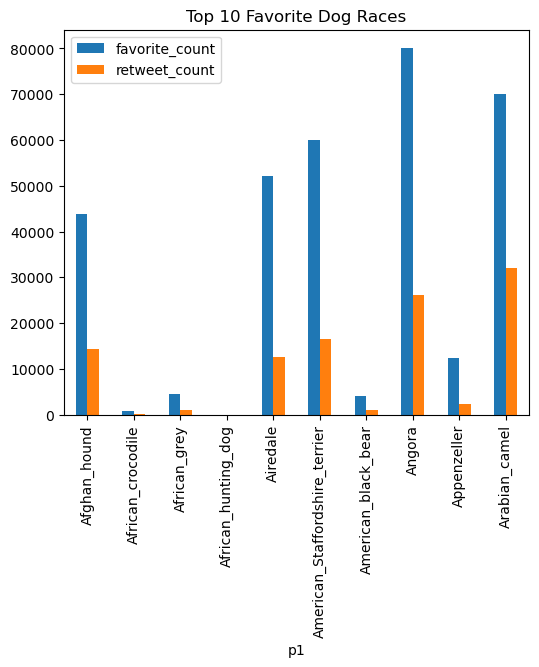

In [1457]:
popularity_breeds[:10].plot(kind='bar', title='Top 10 Favorite Dog Races',
          figsize=(6, 5))